In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
train_path = "DATASET/TRAIN/"
test_path = "DATASET/TEST/"

In [5]:
# Import Tensorflow Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import img_to_array, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from glob import glob

In [6]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:05<00:00, 1753.67it/s]


In [7]:
data.shape

(22564, 2)

In [8]:
from collections import Counter
Counter(y_data)

Counter({'TRAIN\\O': 12565, 'TRAIN\\R': 9999})

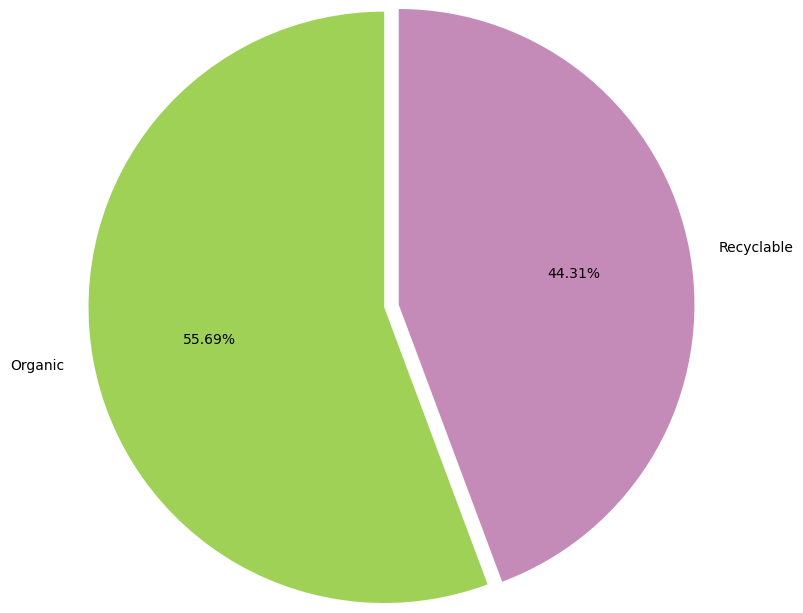

In [9]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

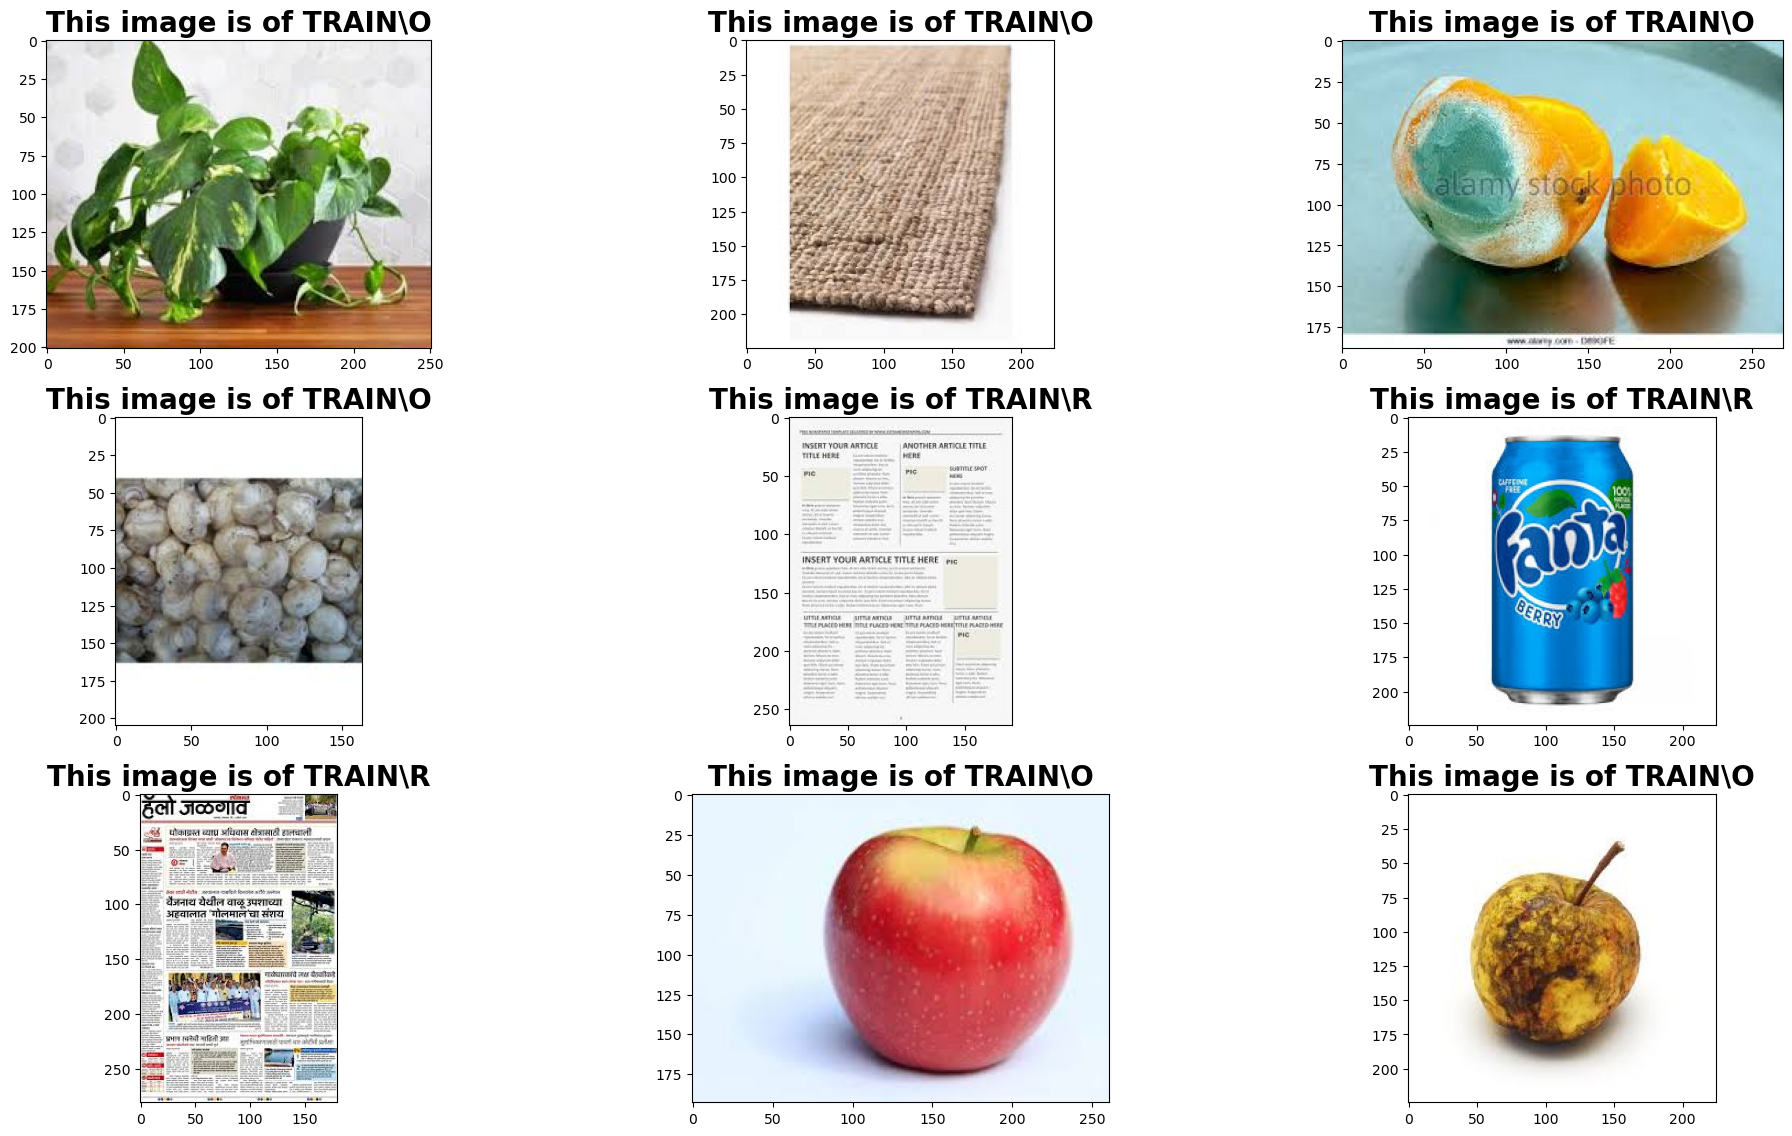

In [10]:
# Data visualization
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

* O -> Organic
* R -> Recyclable

In [11]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [12]:
# Defining a simple CNN
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 128
epochs = 10

In [13]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [14]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [16]:
hist = model.fit(
        x=train_generator,
        epochs=epochs,
        validation_data=test_generator)

Epoch 1/10
177/177 [==============================] - 49s 219ms/step - loss: 0.4890 - accuracy: 0.7947 - val_loss: 0.3495 - val_accuracy: 0.8615
Epoch 2/10
177/177 [==============================] - 28s 158ms/step - loss: 0.3977 - accuracy: 0.8376 - val_loss: 0.3912 - val_accuracy: 0.8333
Epoch 3/10
177/177 [==============================] - 29s 165ms/step - loss: 0.3644 - accuracy: 0.8553 - val_loss: 0.3086 - val_accuracy: 0.8754
Epoch 4/10
177/177 [==============================] - 28s 159ms/step - loss: 0.3250 - accuracy: 0.8701 - val_loss: 0.2663 - val_accuracy: 0.8997
Epoch 5/10
177/177 [==============================] - 28s 158ms/step - loss: 0.3011 - accuracy: 0.8807 - val_loss: 0.3207 - val_accuracy: 0.8902
Epoch 6/10
177/177 [==============================] - 28s 158ms/step - loss: 0.2568 - accuracy: 0.8994 - val_loss: 0.3313 - val_accuracy: 0.8854
Epoch 7/10
177/177 [==============================] - 28s 158ms/step - loss: 0.2190 - accuracy: 0.9157 - val_loss: 0.3162 - val_ac

In [31]:
model.save("recycleRec.h5")

In [18]:
print("Train acc: ", hist.history["accuracy"][epochs-1])
print("Validation acc: ", hist.history["val_accuracy"][epochs-1])
print("Train loss: ", hist.history["loss"][epochs-1])
print("Validation loss: ", hist.history["val_loss"][epochs-1])

Train acc:  0.9634373188018799
Validation acc:  0.9001193642616272
Train loss:  0.1052788496017456
Validation loss:  0.41412341594696045


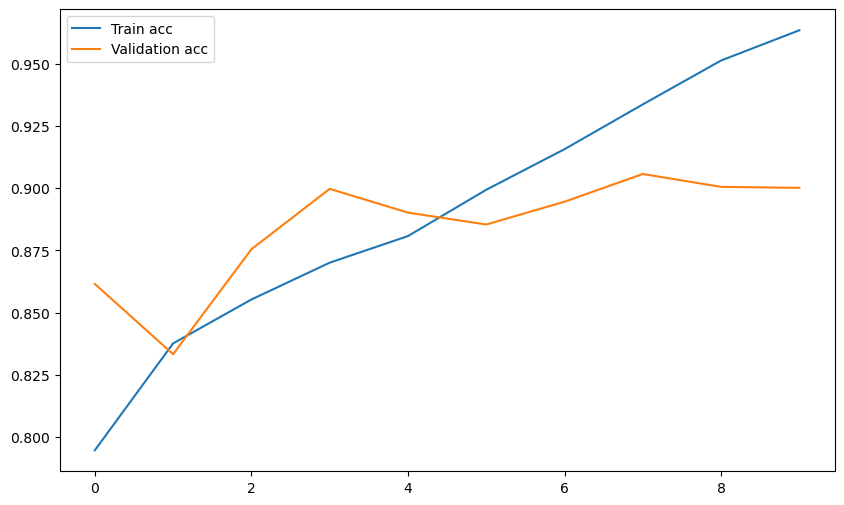

In [19]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

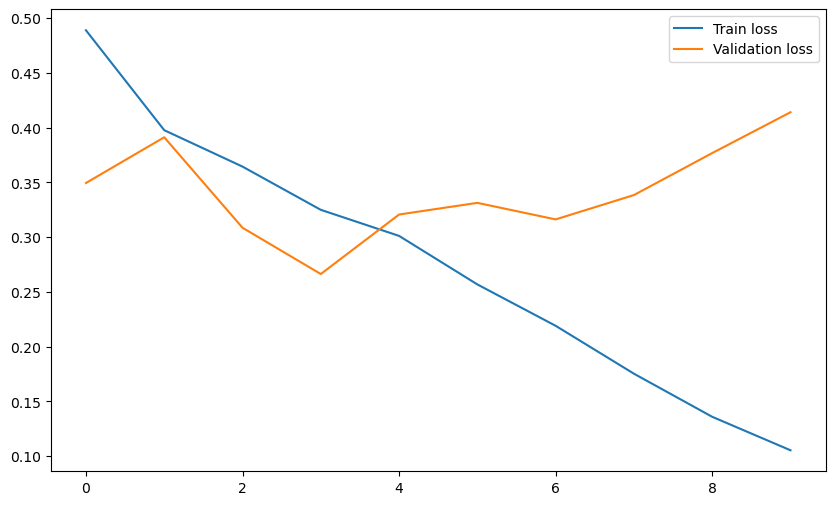

In [20]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [34]:
# Save model as TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\DREAMC~1\AppData\Local\Temp\tmpi_a9_won\assets


INFO:tensorflow:Assets written to: C:\Users\DREAMC~1\AppData\Local\Temp\tmpi_a9_won\assets


In [37]:
# Model prediction
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 [==============================] - 0s 74ms/step
This image -> Organic


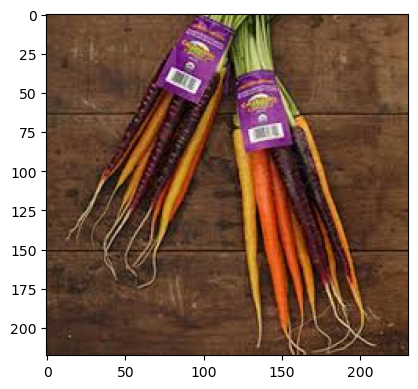

In [38]:
test_img = cv2.imread("DATASET/TEST/O/O_12573.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 17ms/step
This image -> Recyclable


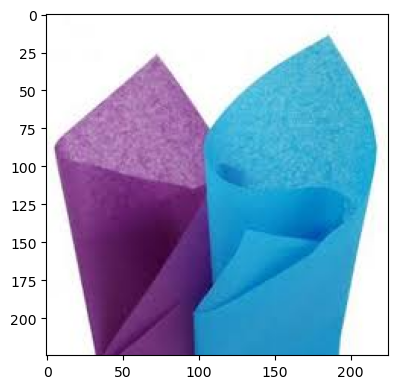

In [23]:
test_img = cv2.imread("DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 21ms/step
This image -> Recyclable


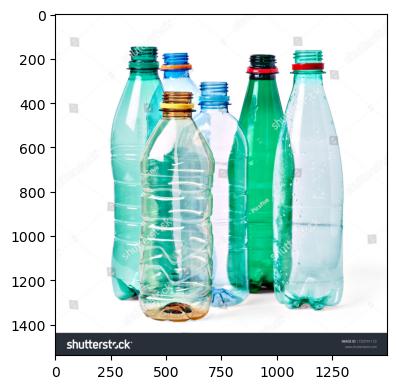

In [24]:
test_img = cv2.imread("Inference/plastic3.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 16ms/step
This image -> Organic


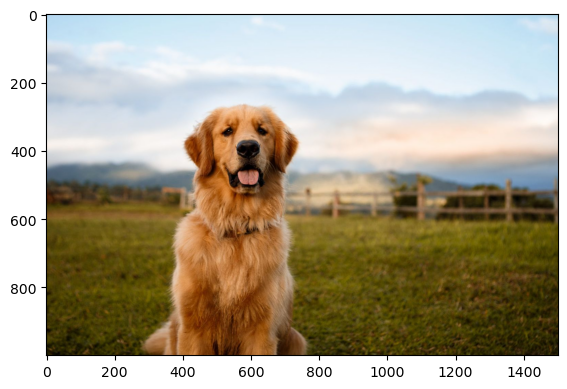

In [25]:
test_img = cv2.imread("Inference/dog.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 14ms/step
This image -> Organic


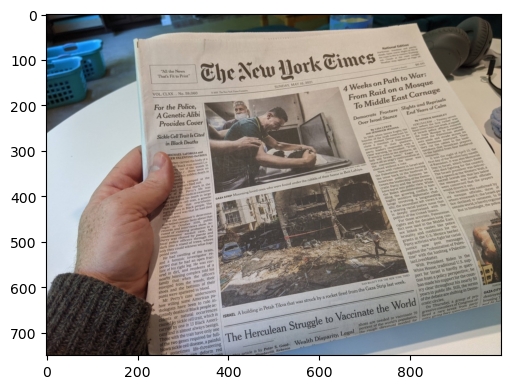

In [26]:
test_img = cv2.imread("Inference/newspaper.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 14ms/step
This image -> Organic


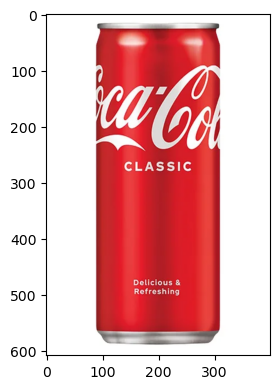

In [27]:
test_img = cv2.imread("Inference/coke.webp")
predict_func(test_img)

1/1 [==============================] - 0s 15ms/step
This image -> Recyclable


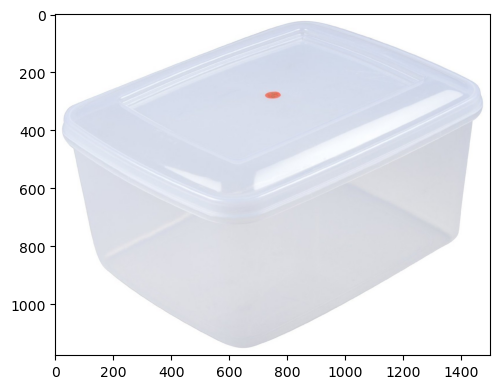

In [28]:
test_img = cv2.imread("Inference/plasticbox.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 18ms/step
This image -> Recyclable


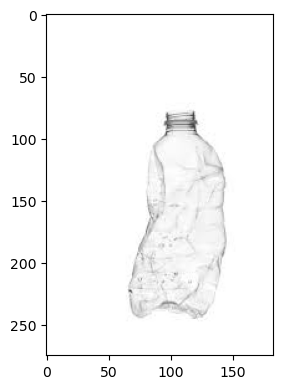

In [40]:
test_img = cv2.imread("DATASET/TRAIN/R/R_2.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 25ms/step
This image -> Recyclable


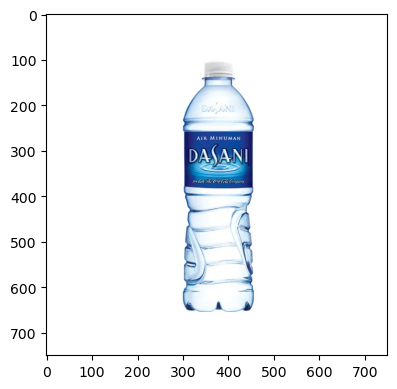

In [39]:
test_img = cv2.imread("Inference/dasani.webp")
predict_func(test_img)